In [60]:
import pandas as pd
import matplotlib.pyplot as plt
# dataset 1 Number of mobile app downloads worldwide from 2016 to 2023 (downloadsData)
!wget -O statistic_id271644_annual-number-of-global-mobile-app-downloads-2016-2023.xlsx "https://github.com/JeffYu12/Individual-Project/raw/main/data/statistic_id271644_annual-number-of-global-mobile-app-downloads-2016-2023.xlsx"
downloadsData = pd.read_excel("statistic_id271644_annual-number-of-global-mobile-app-downloads-2016-2023.xlsx", sheet_name='Data', skiprows=3)
# Data cleaning
downloadsData = downloadsData.dropna(axis=1, how='all')
downloadsData.columns = ['Year', 'Downloads']
downloadsData = downloadsData.dropna(subset=['Year'])
downloadsData = downloadsData.reset_index(drop=True)
downloadsData['Year'] = pd.to_numeric(downloadsData['Year'], errors='coerce')
downloadsData['Downloads'] = pd.to_numeric(downloadsData['Downloads'], errors='coerce')
downloadsData['Year'] = downloadsData['Year'].astype(int)

# Display the cleaned data
downloadsData.head(8)


--2024-12-07 02:39:47--  https://github.com/JeffYu12/Individual-Project/raw/main/data/statistic_id271644_annual-number-of-global-mobile-app-downloads-2016-2023.xlsx
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JeffYu12/Individual-Project/main/data/statistic_id271644_annual-number-of-global-mobile-app-downloads-2016-2023.xlsx [following]
--2024-12-07 02:39:47--  https://raw.githubusercontent.com/JeffYu12/Individual-Project/main/data/statistic_id271644_annual-number-of-global-mobile-app-downloads-2016-2023.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9690 (9.5K) [application/octet-strea

,Year,Downloads
0,2016,140.68
1,2018,192.45
2,2019,204.00
3,2020,218.00
4,2021,230.00
5,2022,255.00
6,2023,257.00


In [65]:
# dataset 2 Number of mobile app downloads worldwide from 2016 to 2023 (spendingData)
!wget -O statistic_id870642_global-mobile-app-consumer-spending-2016-2023.xlsx "https://github.com/JeffYu12/Individual-Project/raw/refs/heads/main/data/statistic_id870642_global-mobile-app-consumer-spending-2016-2023.xlsx"
spendingData = pd.read_excel("statistic_id870642_global-mobile-app-consumer-spending-2016-2023.xlsx", sheet_name='Data', skiprows=3)
# Data cleaning
spendingData = spendingData.dropna(axis=1, how='all')
spendingData.columns = ['Year', 'Spending']
spendingData = spendingData.dropna(subset=['Year'])
spendingData = spendingData.reset_index(drop=True)
spendingData['Year'] = pd.to_numeric(spendingData['Year'], errors='coerce')
spendingData['Spending'] = pd.to_numeric(spendingData['Spending'], errors='coerce')
spendingData['Year'] = spendingData['Year'].astype(int)

# Display the cleaned data
spendingData.head(8)


--2024-12-07 02:43:45--  https://github.com/JeffYu12/Individual-Project/raw/refs/heads/main/data/statistic_id870642_global-mobile-app-consumer-spending-2016-2023.xlsx
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JeffYu12/Individual-Project/refs/heads/main/data/statistic_id870642_global-mobile-app-consumer-spending-2016-2023.xlsx [following]
--2024-12-07 02:43:45--  https://raw.githubusercontent.com/JeffYu12/Individual-Project/refs/heads/main/data/statistic_id870642_global-mobile-app-consumer-spending-2016-2023.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9132 (8.9K) [application/octet

,Year,Spending
0,2016,57.7
1,2017,82.1
2,2018,101.0
3,2019,120.0
4,2020,143.0
5,2021,170.0
6,2022,167.0
7,2023,171.0


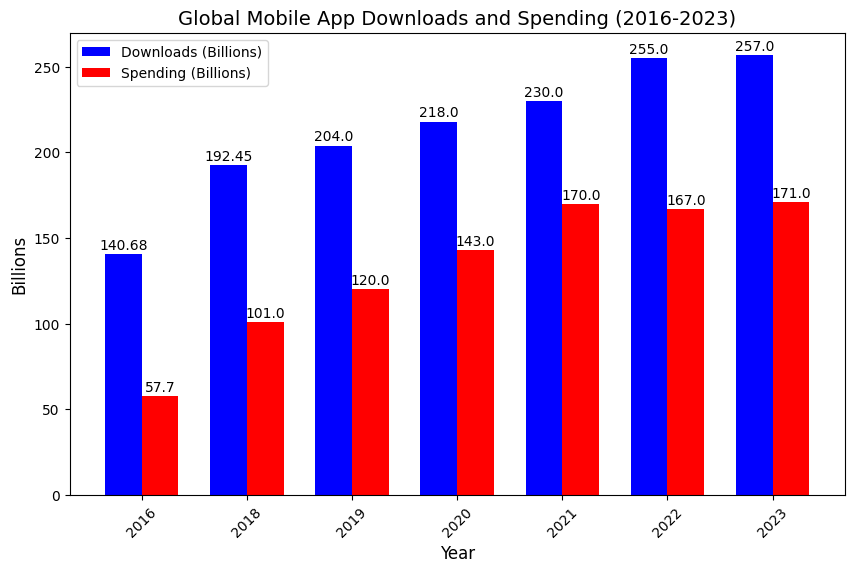

In [67]:
mergedData = pd.merge(downloadsData, spendingData, on='Year', how='inner')

# Set the width of the bars
bar_width = 0.35

# Set positions for the bars on the x-axis
r1 = range(len(mergedData))  # For 'Downloads' bars
r2 = [x + bar_width for x in r1]  # For 'Spending' bars

# Create a bar graph
plt.figure(figsize=(10, 6))

# Plot Downloads data as bars
bars1 = plt.bar(r1, mergedData['Downloads'], width=bar_width, label='Downloads (Billions)', color='blue')

# Plot Spending data as bars next to Downloads
bars2 = plt.bar(r2, mergedData['Spending'], width=bar_width, label='Spending (Billions)', color='red')

# Add numbers above the bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom', fontsize=10, color='black')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom', fontsize=10, color='black')

# Adding labels and title
plt.title('Global Mobile App Downloads and Spending (2016-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Billions', fontsize=12)
plt.xticks([r + bar_width / 2 for r in r1], mergedData['Year'], rotation=45)
plt.legend()

# Display the plot
plt.show()

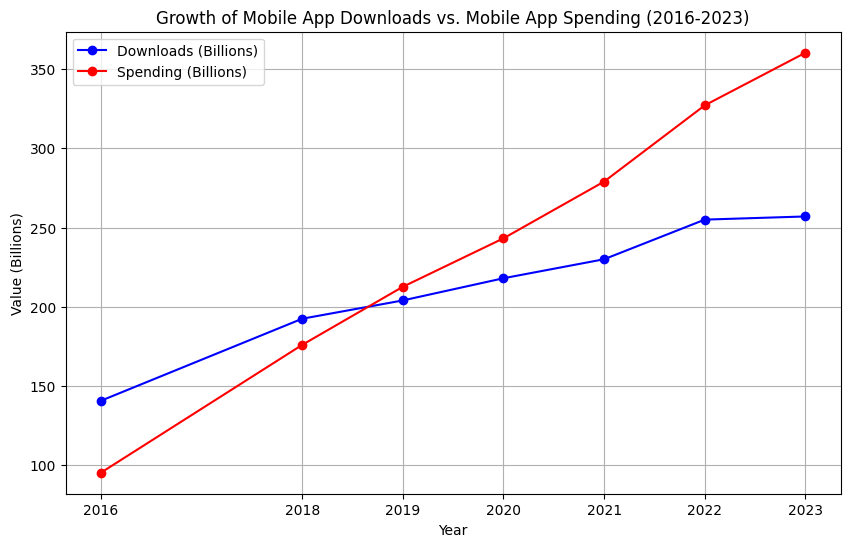

In [73]:
mergedData = pd.merge(downloadsData, adSpendingData, on="Year")

# Display the merged data
mergedData.head(8)

# Plot the growth of mobile app downloads and spending over the years
plt.figure(figsize=(10, 6))

# Plot downloads data
plt.plot(mergedData['Year'], mergedData['Downloads'], label='Downloads (Billions)', marker='o', color='b')

# Plot spending data
plt.plot(mergedData['Year'], mergedData['Spending'] / 1000, label='Spending (Billions)', marker='o', color='r')  # Divide by 1000 to match scale

# Adding labels and title
plt.title('Growth of Mobile App Downloads vs. Mobile App Spending (2016-2023)')
plt.xlabel('Year')
plt.ylabel('Value (Billions)')
plt.legend()

# Show the plot
plt.grid(True)
plt.xticks(mergedData['Year'])  # Ensure all years are shown on the x-axis
plt.show()


In [72]:
# dataset 3 Mobile advertising spending worldwide from 2007 to 2024 (adSpendingData)

!wget -O statistic_id303817_mobile-advertising-spending-worldwide-2007-2024.xlsx "https://github.com/JeffYu12/Individual-Project/raw/refs/heads/main/data/statistic_id303817_mobile-advertising-spending-worldwide-2007-2024.xlsx"
adSpendingData = pd.read_excel("statistic_id303817_mobile-advertising-spending-worldwide-2007-2024.xlsx", sheet_name='Data', header=None)
# Data cleaning
adSpendingData.columns = ['Year', 'Spending']
adSpendingData = adSpendingData.dropna(subset=['Year'])
adSpendingData = adSpendingData.reset_index(drop=True)
adSpendingData['Year'] = pd.to_numeric(adSpendingData['Year'], errors='coerce')
adSpendingData['Spending'] = pd.to_numeric(adSpendingData['Spending'], errors='coerce')

# Display the cleaned data
adSpendingData.head(8)




--2024-12-07 03:22:00--  https://github.com/JeffYu12/Individual-Project/raw/refs/heads/main/data/statistic_id303817_mobile-advertising-spending-worldwide-2007-2024.xlsx
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JeffYu12/Individual-Project/refs/heads/main/data/statistic_id303817_mobile-advertising-spending-worldwide-2007-2024.xlsx [following]
--2024-12-07 03:22:00--  https://raw.githubusercontent.com/JeffYu12/Individual-Project/refs/heads/main/data/statistic_id303817_mobile-advertising-spending-worldwide-2007-2024.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15727 (15K) [application

,Year,Spending
0,2016,95264
1,2017,137678
2,2018,175953
3,2019,212609
4,2020,243203
5,2021,279011
6,2022,327135
7,2023,360334


In [88]:
# dataset 4 Revenue of mobile apps worldwide 2019-2027, by segment (millions usd)
!wget -O statistic_id1262892_mobile-app-revenue-worldwide-2019-2027-by-segment.xlsx "https://github.com/JeffYu12/Individual-Project/raw/refs/heads/main/data/statistic_id1262892_mobile-app-revenue-worldwide-2019-2027-by-segment.xlsx"
revenueData = pd.read_excel("statistic_id1262892_mobile-app-revenue-worldwide-2019-2027-by-segment.xlsx", sheet_name='Data')

# Extract relevant columns: Year and Total Revenue
revenueData = revenueData[['Unnamed: 1', 'Unnamed: 23']]  # Year and Total Revenue
revenueData.columns = ['Year', 'Total Revenue']

# Drop any rows with NaN values
revenueData = revenueData.dropna()

# Convert the 'Year' column to numeric and 'Total Revenue' to float
revenueData['Year'] = pd.to_numeric(revenueData['Year'], errors='coerce')
revenueData['Total Revenue'] = pd.to_numeric(revenueData['Total Revenue'], errors='coerce')

# Drop rows where 'Year' or 'Total Revenue' are NaN
revenueData = revenueData.dropna(subset=['Year', 'Total Revenue'])

# Merge with the previous datasets (downloadsData and adSpendingData)
mergedData = pd.merge(downloadsData, adSpendingData, on="Year")
mergedData = pd.merge(mergedData, revenueData, on="Year")

# Now mergedData contains 'Downloads', 'Spending', and 'Total Revenue'

# Check the merged data
print(mergedData.head())

--2024-12-07 04:13:32--  https://github.com/JeffYu12/Individual-Project/raw/refs/heads/main/data/statistic_id1262892_mobile-app-revenue-worldwide-2019-2027-by-segment.xlsx
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JeffYu12/Individual-Project/refs/heads/main/data/statistic_id1262892_mobile-app-revenue-worldwide-2019-2027-by-segment.xlsx [following]
--2024-12-07 04:13:32--  https://raw.githubusercontent.com/JeffYu12/Individual-Project/refs/heads/main/data/statistic_id1262892_mobile-app-revenue-worldwide-2019-2027-by-segment.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18250 (18K) [ap

Correlation between Ad Spending Growth and Downloads Growth: 0.98
Correlation between Ad Spending Growth and Revenue Growth: -0.08
Correlation between Downloads Growth and Revenue Growth: -0.22


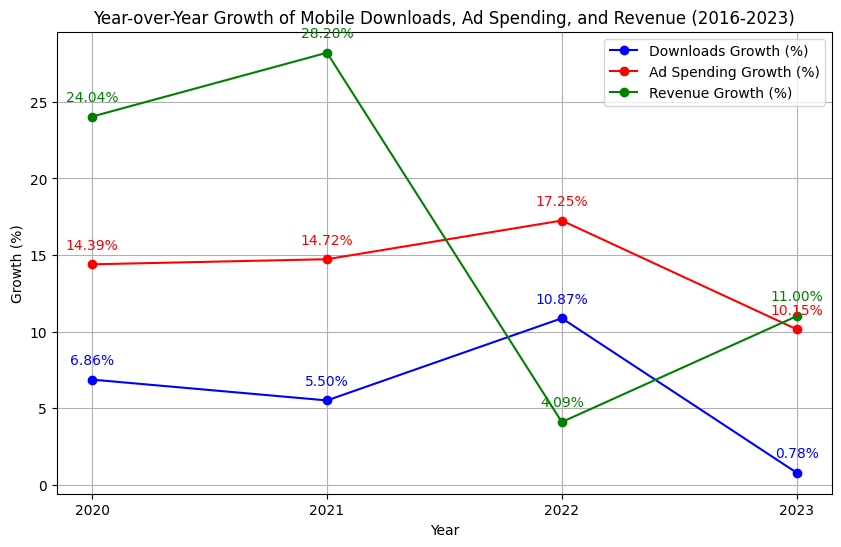

In [93]:
mergedData = pd.merge(downloadsData, adSpendingData, on="Year")

# Merge with Revenue Data (already cleaned)
# Ensure revenueData contains 'Year' and 'Total Revenue' columns
mergedData = pd.merge(mergedData, revenueData[['Year', 'Total Revenue']], on='Year')

# Calculate the year-over-year growth (percentage change) for each column
mergedData['Downloads Growth (%)'] = mergedData['Downloads'].pct_change() * 100
mergedData['Spending Growth (%)'] = mergedData['Spending'].pct_change() * 100
mergedData['Revenue Growth (%)'] = mergedData['Total Revenue'].pct_change() * 100

# Drop the first row (which has NaN values after pct_change calculation)
mergedData = mergedData.dropna()

# Calculate the correlation coefficients
correlation_spending_downloads_growth = mergedData['Spending Growth (%)'].corr(mergedData['Downloads Growth (%)'])
correlation_spending_revenue_growth = mergedData['Spending Growth (%)'].corr(mergedData['Revenue Growth (%)'])
correlation_downloads_revenue_growth = mergedData['Downloads Growth (%)'].corr(mergedData['Revenue Growth (%)'])

# Print correlation coefficients
print(f"Correlation between Ad Spending Growth and Downloads Growth: {correlation_spending_downloads_growth:.2f}")
print(f"Correlation between Ad Spending Growth and Revenue Growth: {correlation_spending_revenue_growth:.2f}")
print(f"Correlation between Downloads Growth and Revenue Growth: {correlation_downloads_revenue_growth:.2f}")

# Plot all growth variables on the same graph for comparison
plt.figure(figsize=(10, 6))

# Plot Downloads Growth
plt.plot(mergedData['Year'], mergedData['Downloads Growth (%)'], label='Downloads Growth (%)', marker='o', color='b')

# Plot Spending Growth
plt.plot(mergedData['Year'], mergedData['Spending Growth (%)'], label='Ad Spending Growth (%)', marker='o', color='r')

# Plot Revenue Growth
plt.plot(mergedData['Year'], mergedData['Revenue Growth (%)'], label='Revenue Growth (%)', marker='o', color='g')

# Add values above each point for better readability
for index, row in mergedData.iterrows():
    # Adding text for Downloads Growth
    plt.text(row['Year'], row['Downloads Growth (%)'] + 1, f'{row["Downloads Growth (%)"]:.2f}%', ha='center', color='b')

    # Adding text for Ad Spending Growth
    plt.text(row['Year'], row['Spending Growth (%)'] + 1, f'{row["Spending Growth (%)"]:.2f}%', ha='center', color='r')

    # Adding text for Revenue Growth
    plt.text(row['Year'], row['Revenue Growth (%)'] + 1, f'{row["Revenue Growth (%)"]:.2f}%', ha='center', color='g')

# Add labels and title
plt.title('Year-over-Year Growth of Mobile Downloads, Ad Spending, and Revenue (2016-2023)')
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.legend()

# Show the plot
plt.grid(True)
plt.xticks(mergedData['Year'])  # Ensure all years are shown on the x-axis
plt.show()